In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
# Import necessary libraries

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv("Parkinsson disease.csv")

# Display the first few rows of the dataset
data.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
X = data[data.columns[~data.columns.isin(['status','name'])]]
y = pd.DataFrame(data['status'])

print('* Data :')
X.head()

print('\n\n* Target :')
y.head()

* Data :


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335




* Target :


,status
0,1
1,1
2,1
3,1
4,1


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()

In [7]:
# Standardize features (important for PCA)
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Step 1: feature reduction using PCA - training/evaluating SVM/knn/RF

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

Text(0.5, 1.0, 'Cumulative Explained Variance vs. Number of Components')

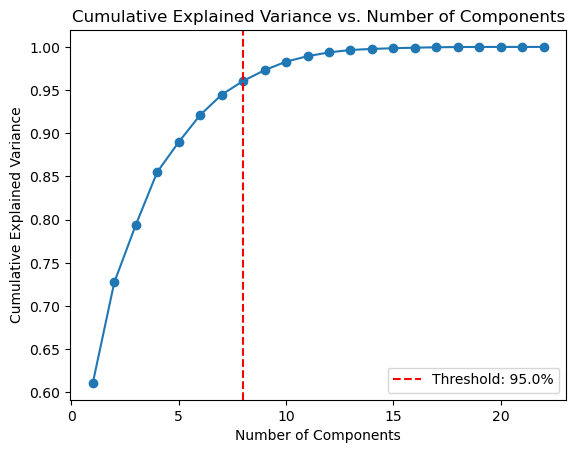

In [8]:
# Set a threshold for cumulative explained variance (e.g., 95%)
threshold_variance = 0.95

# Fit PCA to the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_standardized)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index where cumulative variance first exceeds the threshold
num_components = np.argmax(cumulative_variance_ratio >= threshold_variance) + 1

# Plot the explained variance ratio with the threshold
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=num_components, color='red', linestyle='--', label=f'Threshold: {threshold_variance * 100}%')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.legend()
plt.show()

# Use the determined number of components in PCA
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.fit_transform(X_test_standardized)


In [9]:
# Create models
svm_model = SVC()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

# Perform cross-validation
models = [svm_model, rf_model, knn_model]


In [10]:
for model in models:
    # Train the model using cross-validation on the training set
    scores_train = cross_val_score(model, X_train_pca, y_train.values.ravel(), cv=5, scoring='accuracy')
    print(f'\n{type(model).__name__} - Training Accuracy: {np.mean(scores_train)}')

    # Fit the model on the entire training set for further evaluation and grid search
    model.fit(X_train_pca, y_train.values.ravel())

    # Evaluate the model on the testing set
    accuracy_test = model.score(X_test_pca, y_test.values.ravel())
    print(f'{type(model).__name__} - Testing Accuracy: {accuracy_test}')

    # Hyperparameter tuning using Grid Search
    if model == svm_model:
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    elif model == rf_model:
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    elif model == knn_model:
        param_grid = {'n_neighbors': [3, 5, 7]}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_pca, y_train.values.ravel())

    print(f'Best parameters for {type(model).__name__} from Grid Search: {grid_search.best_params_}')



SVC - Training Accuracy: 0.8780241935483872


SVC()

SVC - Testing Accuracy: 0.6923076923076923


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

Best parameters for SVC from Grid Search: {'C': 10, 'kernel': 'rbf'}

RandomForestClassifier - Training Accuracy: 0.8655241935483872


RandomForestClassifier()

RandomForestClassifier - Testing Accuracy: 0.6666666666666666


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Best parameters for RandomForestClassifier from Grid Search: {'max_depth': 10, 'n_estimators': 100}

KNeighborsClassifier - Training Accuracy: 0.8780241935483872


KNeighborsClassifier()

KNeighborsClassifier - Testing Accuracy: 0.7435897435897436


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

Best parameters for KNeighborsClassifier from Grid Search: {'n_neighbors': 3}


# Step 2: feature reduction using Correlation - training/evaluating SVM/knn/RF

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Correlation Matrix')

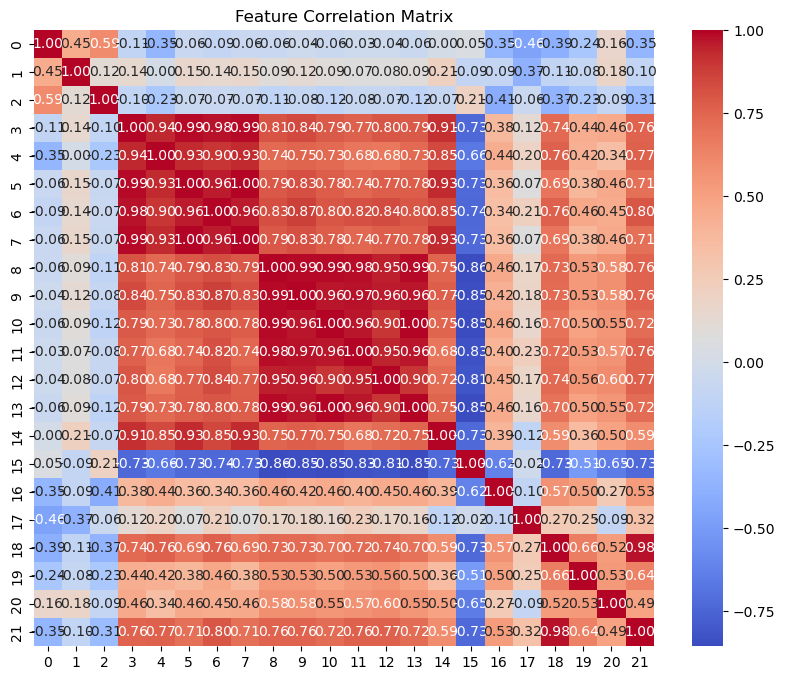

In [11]:
# Calculate correlation matrix
correlation_matrix = pd.DataFrame(X_train_standardized).corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [12]:
# Set a threshold for correlation strength
threshold = 0.8

# Find highly correlated pairs
highly_correlated_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_feature = correlation_matrix.index[j]
            highly_correlated_pairs.add((colname, correlated_feature))

In [13]:
highly_correlated_pairs

{(4, 3),
 (5, 3),
 (5, 4),
 (6, 3),
 (6, 4),
 (6, 5),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (8, 3),
 (8, 6),
 (9, 3),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (10, 6),
 (10, 8),
 (10, 9),
 (11, 6),
 (11, 8),
 (11, 9),
 (11, 10),
 (12, 6),
 (12, 8),
 (12, 9),
 (12, 10),
 (12, 11),
 (13, 6),
 (13, 8),
 (13, 9),
 (13, 10),
 (13, 11),
 (13, 12),
 (14, 3),
 (14, 4),
 (14, 5),
 (14, 6),
 (14, 7),
 (15, 8),
 (15, 9),
 (15, 10),
 (15, 11),
 (15, 12),
 (15, 13),
 (21, 6),
 (21, 18)}

In [14]:
# Drop highly correlated features
all_feature_1=[]
all_feature_2=[]
for pair in highly_correlated_pairs:
    feature1, feature2 = pair
    all_feature_1.append(feature1)
    all_feature_2.append(feature2)


In [15]:
# Convert lists to sets to remove redundancy
unique_features_1 = set(all_feature_1)
unique_features_2 = set(all_feature_2)

In [16]:
unique_features_1
unique_features_2

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 21}

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18}

In [17]:
# Compare lengths and decide which set to keep
if len(unique_features_1) > len(unique_features_2):
    features_to_drop = list(unique_features_1)
else:
    features_to_drop = list(unique_features_2)
features_to_drop

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 21]

In [18]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
135,110.453,127.611,105.554,0.00494,0.00004,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
122,138.190,203.522,83.340,0.00704,0.00005,0.00406,0.00398,0.01218,0.04479,0.441,...,0.03220,0.07761,0.01968,18.305,0.538016,0.741480,-5.418787,0.160267,2.090438,0.229892
167,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
85,180.978,200.125,155.495,0.00406,0.00002,0.00220,0.00244,0.00659,0.03852,0.331,...,0.02877,0.06321,0.02782,16.176,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,155.078,163.736,144.148,0.00168,0.00001,0.00068,0.00092,0.00204,0.01064,0.097,...,0.00928,0.01567,0.00233,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
14,152.845,163.305,75.836,0.00294,0.00002,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
92,148.272,164.989,142.299,0.00459,0.00003,0.00250,0.00256,0.00750,0.04190,0.383,...,0.03051,0.07150,0.01914,18.780,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730


In [19]:
# Assuming features_to_drop contains the indexes to drop
column_names_to_drop = X_train.columns[features_to_drop].tolist()
column_names_to_drop

['MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'PPE']

In [20]:
# Drop highly correlated features

X_train_corr = X_train[X_train.columns[~X_train.columns.isin(column_names_to_drop)]]
X_test_corr = X_test[X_test.columns[~X_test.columns.isin(column_names_to_drop)]]


In [21]:
X_train_corr.head()
X_test_corr.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),RPDE,DFA,spread1,spread2,D2
5,120.552,131.162,113.787,0.00968,0.415564,0.825069,-4.242867,0.299111,2.187560
135,110.453,127.611,105.554,0.00494,0.653427,0.706687,-5.333619,0.322044,2.631793
122,138.190,203.522,83.340,0.00704,0.538016,0.741480,-5.418787,0.160267,2.090438
167,260.105,264.919,237.303,0.00339,0.440988,0.628058,-7.517934,0.160414,1.881767
85,180.978,200.125,155.495,0.00406,0.583574,0.727747,-5.657899,0.315903,3.098256


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),RPDE,DFA,spread1,spread2,D2
138,112.239,126.609,104.095,0.00472,0.640945,0.701404,-5.634576,0.306014,2.419253
16,144.188,349.259,82.764,0.00544,0.567380,0.644692,-5.440040,0.239764,2.264501
155,117.870,127.349,95.654,0.00647,0.628300,0.652025,-3.583722,0.207914,2.439597
96,159.116,168.913,144.811,0.00342,0.366329,0.693429,-6.417440,0.194627,2.473239
68,143.533,162.215,65.809,0.01101,0.513237,0.731444,-5.869750,0.151814,2.118496


In [22]:
for model in models:
    # Train the model using cross-validation on the training set
    scores_train = cross_val_score(model, X_train_corr, y_train.values.ravel(), cv=5, scoring='accuracy')
    print(f'\n{type(model).__name__} - Training Accuracy: {np.mean(scores_train)}')

    # Fit the model on the entire training set for further evaluation and grid search
    model.fit(X_train_corr, y_train.values.ravel())

    # Evaluate the model on the testing set
    accuracy_test = model.score(X_test_corr, y_test.values.ravel())
    print(f'{type(model).__name__} - Testing Accuracy: {accuracy_test}')

    # Hyperparameter tuning using Grid Search
    if model == svm_model:
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    elif model == rf_model:
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    elif model == knn_model:
        param_grid = {'n_neighbors': [3, 5, 7]}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_corr, y_train.values.ravel())

    print(f'Best parameters for {type(model).__name__} from Grid Search: {grid_search.best_params_}')


SVC - Training Accuracy: 0.7949596774193548


SVC()

SVC - Testing Accuracy: 0.8205128205128205


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

Best parameters for SVC from Grid Search: {'C': 1, 'kernel': 'linear'}

RandomForestClassifier - Training Accuracy: 0.9102822580645162


RandomForestClassifier()

RandomForestClassifier - Testing Accuracy: 0.9230769230769231


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Best parameters for RandomForestClassifier from Grid Search: {'max_depth': 10, 'n_estimators': 50}

KNeighborsClassifier - Training Accuracy: 0.8268145161290322


KNeighborsClassifier()

KNeighborsClassifier - Testing Accuracy: 0.8205128205128205


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

Best parameters for KNeighborsClassifier from Grid Search: {'n_neighbors': 3}
